In [101]:
import pandas as pd
import numpy as np

In [102]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_profiling
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
sns.set_style("whitegrid")

In [103]:
df = pd.read_csv("insurance.csv")
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [105]:
object_columns=[col for col in df.select_dtypes(include=["object"])]
object_columns

['sex', 'smoker', 'region']

In [106]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

### Checking for missing values

In [107]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Dataset has no missing values

### Somker and non-smoker count

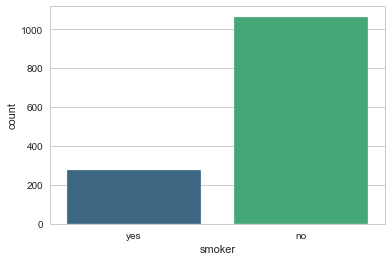

In [108]:
sns.countplot(x='smoker',data=df,palette='viridis')

#### The above graph shows the count of smokers and non-smokers

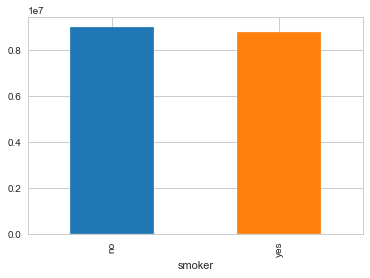

In [109]:
by_smoker = df.groupby('smoker').charges.sum()
by_smoker.plot(kind='bar')

In [110]:
df[df['smoker'] == "yes"].count()

age         274
sex         274
bmi         274
children    274
smoker      274
region      274
charges     274
dtype: int64

### Children count

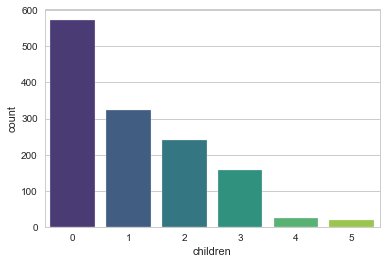

In [111]:
sns.countplot(x='children',data=df,palette='viridis')

#### The graph shows the count of children they have

In [112]:
df.age.nunique()

47

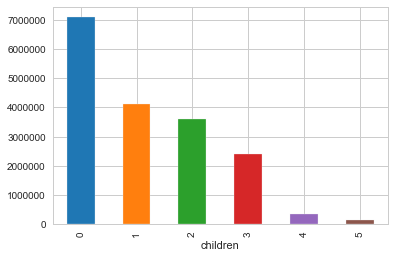

In [113]:
by_nofchildren = df.groupby('children').charges.sum()
by_nofchildren.plot(kind='bar')

### Gender Count

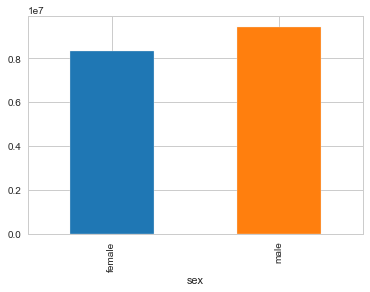

In [114]:
by_sex = df.groupby('sex').charges.sum()
by_sex.plot(kind='bar')

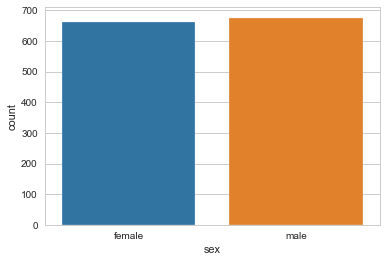

In [115]:
sns.countplot(x='sex',data=df)

### Gender Count according to Region

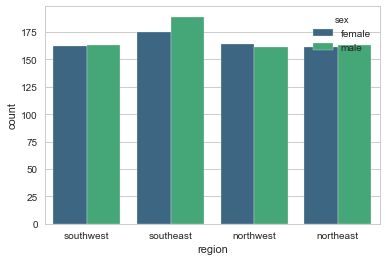

In [116]:
sns.countplot(x='region',data=df,hue='sex',palette='viridis')


### Health Insurance Charges according to Region

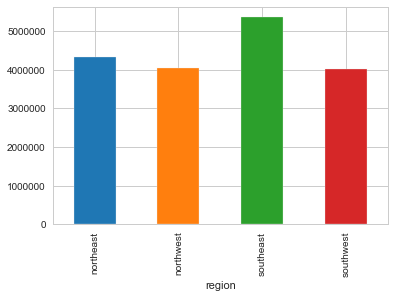

In [117]:
by_region = df.groupby('region').charges.sum()
by_region.plot(kind='bar')

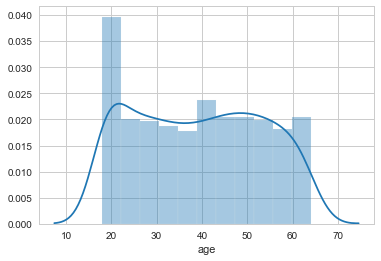

In [118]:
sns.distplot(df['age'])

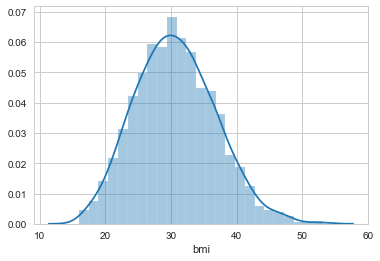

In [119]:
sns.distplot(df['bmi'])

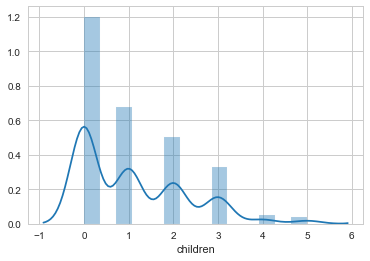

In [120]:
sns.distplot(df['children'])

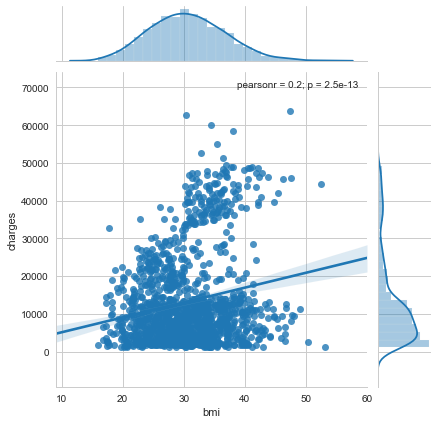

In [121]:
sns.jointplot(x='bmi',y='charges',data=df,kind='reg')

In [122]:
df.iplot(kind='scatter',x='charges',y='bmi',mode='markers',size=10)

In [123]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [124]:
import cufflinks as cf

In [125]:
Underweight = df[df["bmi"] < 18.5].bmi.count()
Normal = df[(df["bmi"] > 18.5) & (df["bmi"] < 24.9)].bmi.count()
Overweight = df[(df["bmi"] > 25) & (df["bmi"] < 29.9)].bmi.count()
Obese = df[df["bmi"] > 30].bmi.count()

bmi = pd.DataFrame({'Category':['Underweight','Normal','Overweight', 'Obese'],'Values':[Underweight,Normal,Overweight,Obese]})
bmi

Category  Values
0  Underweight      20
1       Normal     221
2   Overweight     372
3        Obese     705

In [126]:
bmi.iplot(kind='bar',x='Category',y='Values')

In [127]:
# For Notebooks
init_notebook_mode(connected=True)

In [128]:
# For offline use
cf.go_offline()

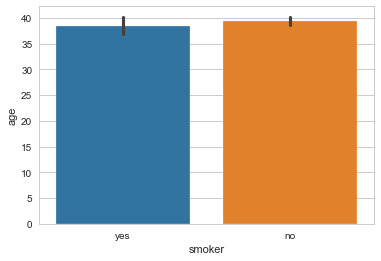

In [129]:
sns.barplot(x='smoker',y='age',data=df)

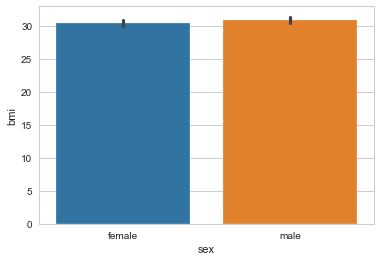

In [130]:
sns.barplot(x='sex',y='bmi',data=df)

In [131]:
def obese_check(column):
    mapped=[]
    for row in column:
        if row>=30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
df["obese"]=obese_check(df["bmi"])
df.head()

age     sex     bmi  children smoker     region      charges  obese
0   19  female  27.900         0    yes  southwest  16884.92400      0
1   18    male  33.770         1     no  southeast   1725.55230      1
2   28    male  33.000         3     no  southeast   4449.46200      1
3   33    male  22.705         0     no  northwest  21984.47061      0
4   32    male  28.880         0     no  northwest   3866.85520      0

In [132]:
def overweight_check(column):
    mapped=[]
    for row in column:
        if row>=25 and row<=29.99:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
df["overweight"]=overweight_check(df["bmi"])
df.head()

age     sex     bmi  children smoker     region      charges  obese  \
0   19  female  27.900         0    yes  southwest  16884.92400      0   
1   18    male  33.770         1     no  southeast   1725.55230      1   
2   28    male  33.000         3     no  southeast   4449.46200      1   
3   33    male  22.705         0     no  northwest  21984.47061      0   
4   32    male  28.880         0     no  northwest   3866.85520      0   

   overweight  
0           1  
1           0  
2           0  
3           0  
4           1

In [133]:
def normalweight_check(column):
    mapped=[]
    for row in column:
        if row>=18.5 and row<=24.9:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
df["normalweight"]=normalweight_check(df["bmi"])
df.head()

age     sex     bmi  children smoker     region      charges  obese  \
0   19  female  27.900         0    yes  southwest  16884.92400      0   
1   18    male  33.770         1     no  southeast   1725.55230      1   
2   28    male  33.000         3     no  southeast   4449.46200      1   
3   33    male  22.705         0     no  northwest  21984.47061      0   
4   32    male  28.880         0     no  northwest   3866.85520      0   

   overweight  normalweight  
0           1             0  
1           0             0  
2           0             0  
3           0             1  
4           1             0

In [134]:
def underweight_check(column):
    mapped=[]
    for row in column:
        if row<=18.5:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
df["underweight"]=underweight_check(df["bmi"])
df.head()

age     sex     bmi  children smoker     region      charges  obese  \
0   19  female  27.900         0    yes  southwest  16884.92400      0   
1   18    male  33.770         1     no  southeast   1725.55230      1   
2   28    male  33.000         3     no  southeast   4449.46200      1   
3   33    male  22.705         0     no  northwest  21984.47061      0   
4   32    male  28.880         0     no  northwest   3866.85520      0   

   overweight  normalweight  underweight  
0           1             0            0  
1           0             0            0  
2           0             0            0  
3           0             1            0  
4           1             0            0

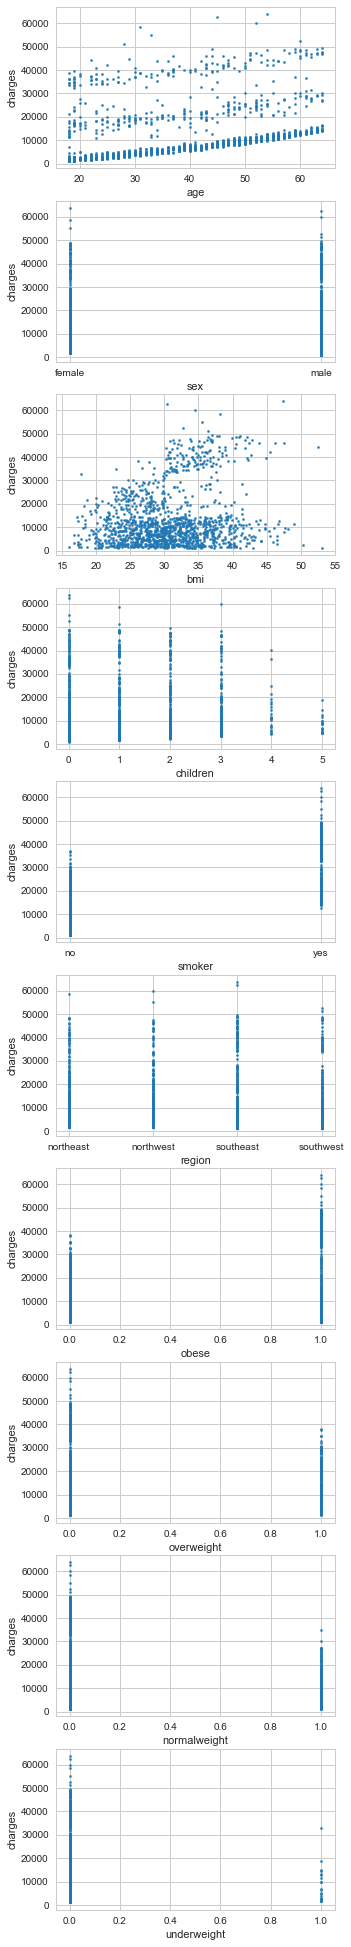

In [135]:
colnum=len(df.columns)-1
fig,ax=plt.subplots(colnum,1,figsize=(5,35))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in df.columns if i not in ["charges"]]):
    
    ax[ind].scatter(df[col],df.charges,s=5)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges")    
plt.show()

In [136]:
pandas_profiling.ProfileReport(df)

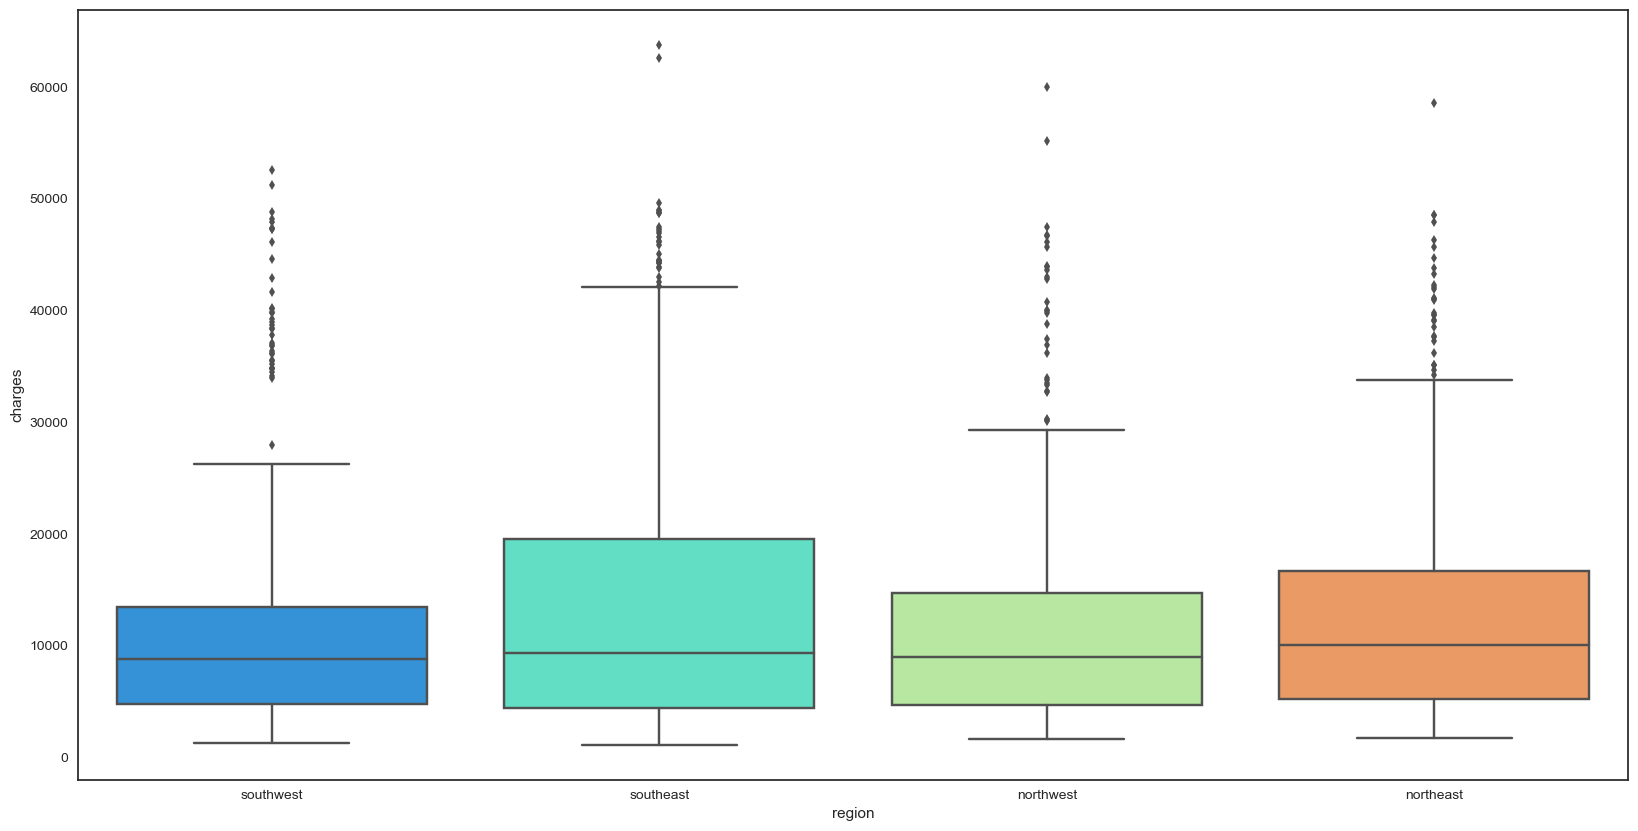

In [137]:
fig = plt.figure(1, figsize=(20, 10))
sns.set_style('white')
ax = sns.boxplot(x="region", y="charges", data=df, palette='rainbow')

As we can observe, region of origin doesn’t have much impact with the amount of medical cost.

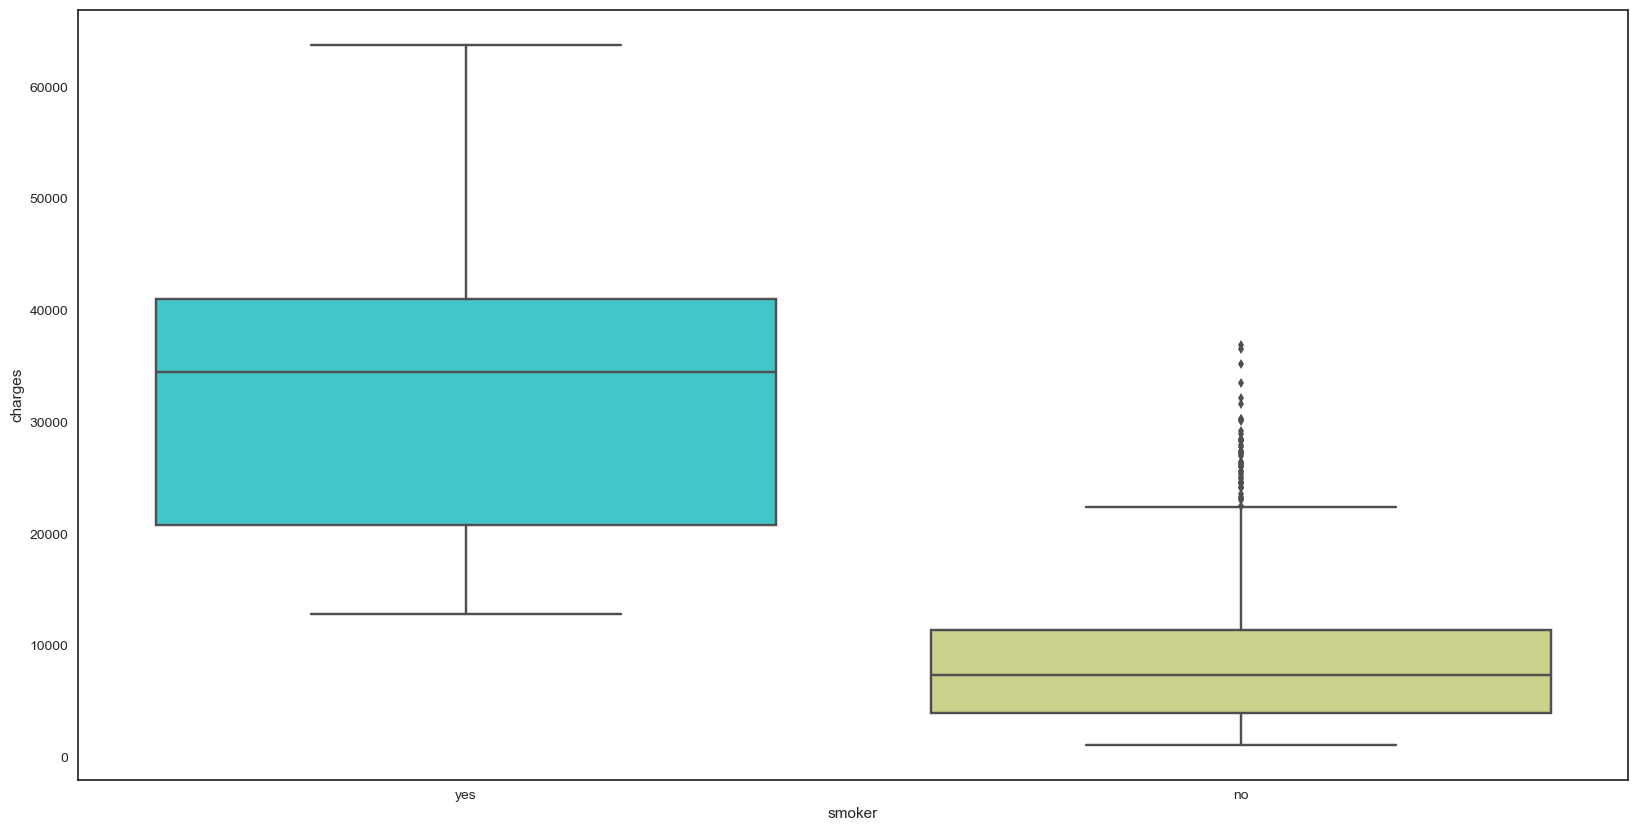

In [138]:
fig = plt.figure(1, figsize=(20, 10))
sns.set_style('white')
ax = sns.boxplot(x="smoker", y="charges", data=df, palette='rainbow')

On the other hand, the same cannot be said with smoking status. It can be clearly deceived that smokers spends a lot more in medical expenses compared to non-smokers by almost 4x.

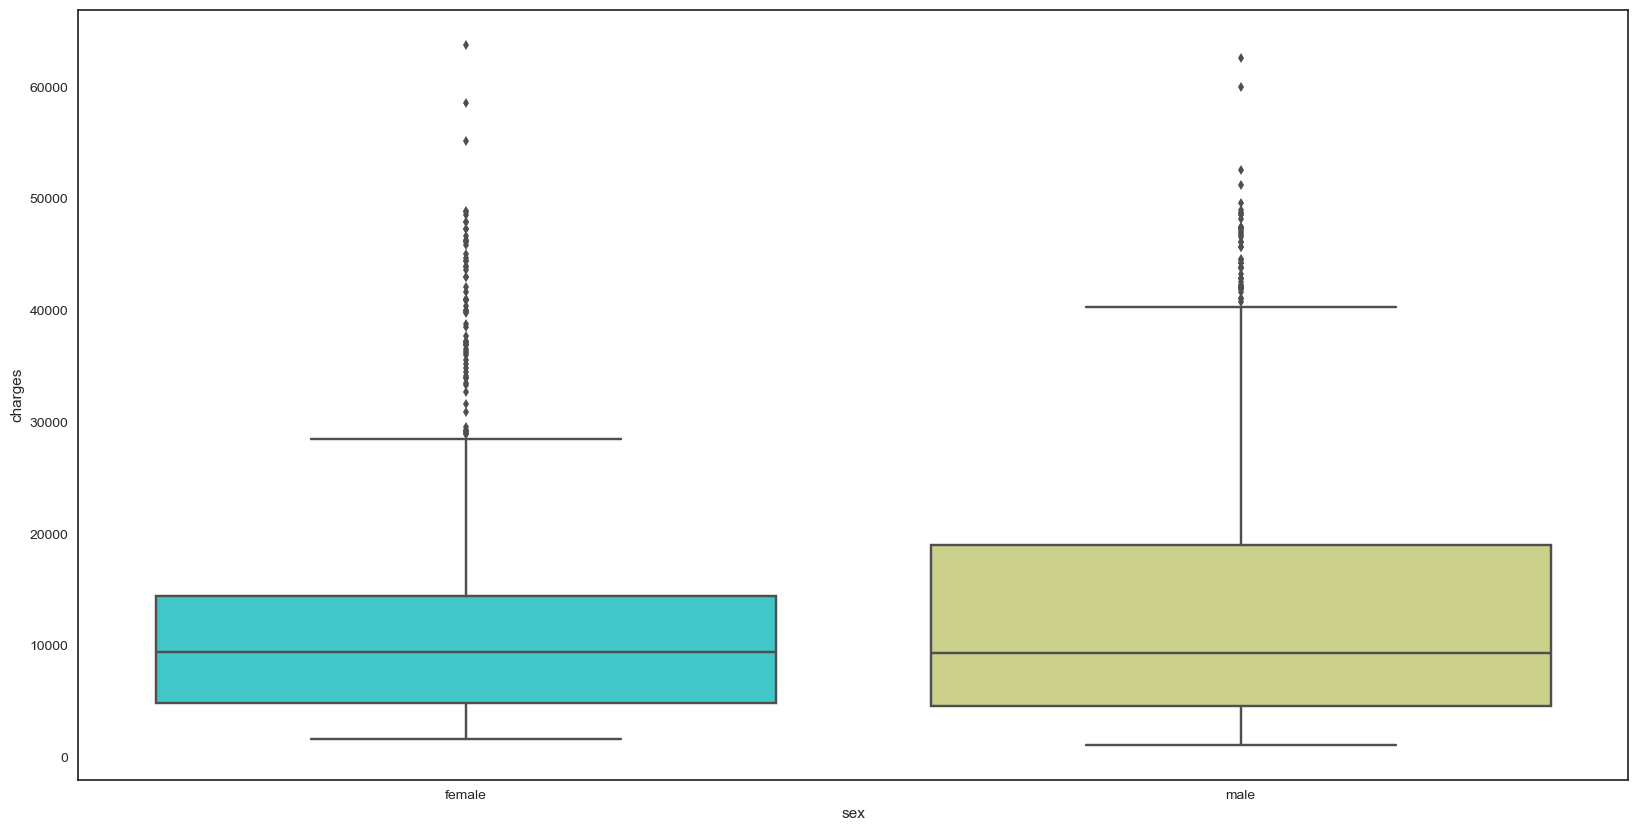

In [139]:
fig = plt.figure(1, figsize=(20, 10))
sns.set_style('white')
ax = sns.boxplot(x="sex", y="charges", data=df, palette='rainbow')

Medical expenses doesn’t seem to be affected by gender as well.

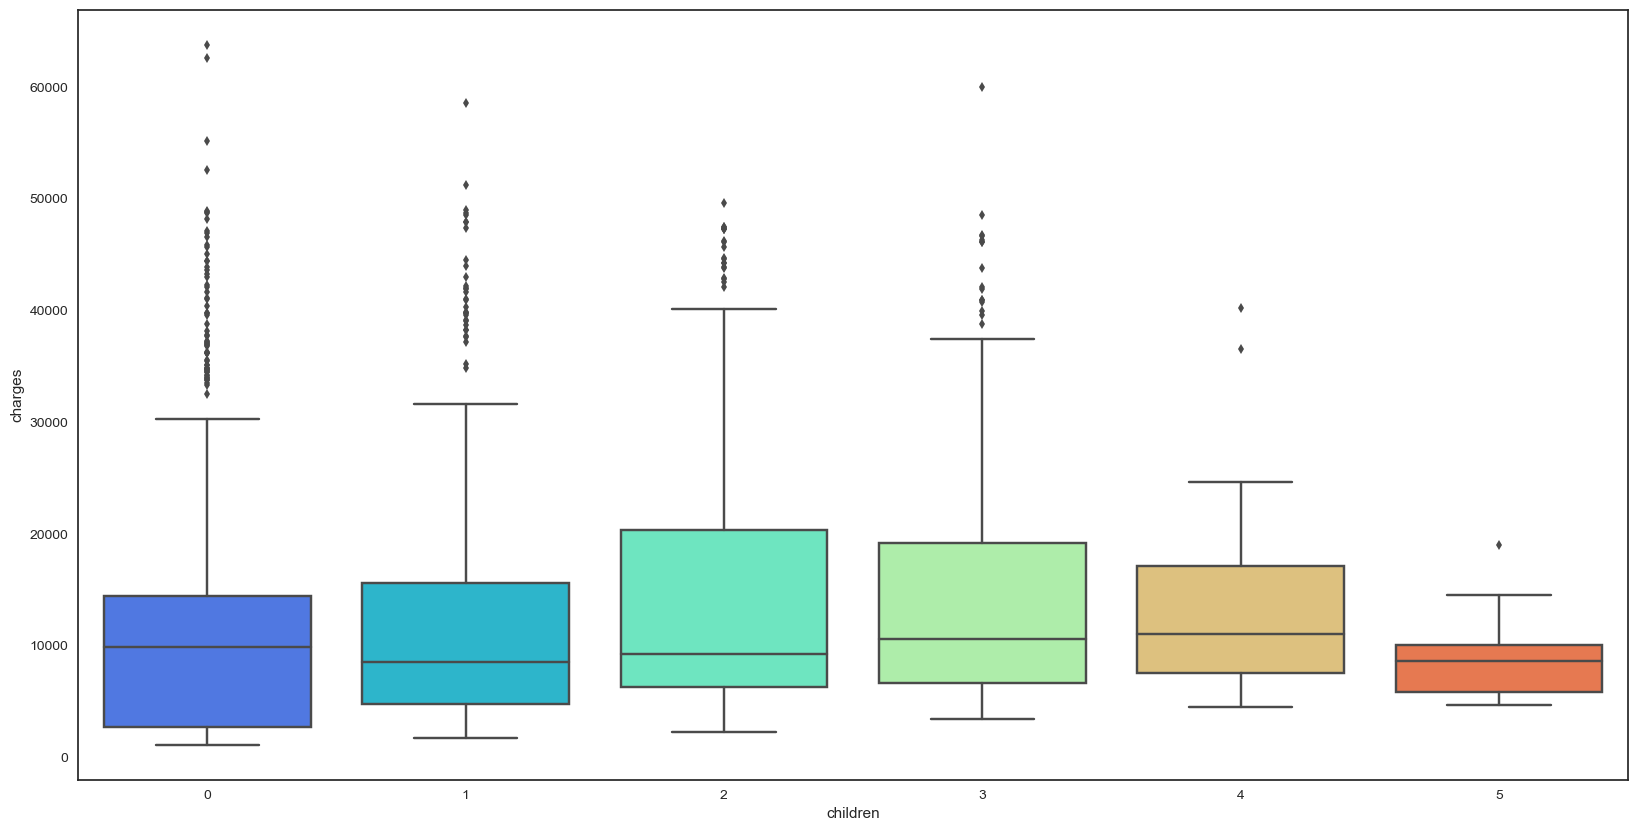

In [140]:
fig = plt.figure(1, figsize=(20, 10))
sns.set_style('white')
ax = sns.boxplot(x="children", y="charges", data=df, palette='rainbow')

People with 5 children on average has less medical expenditures compared to the other groups.

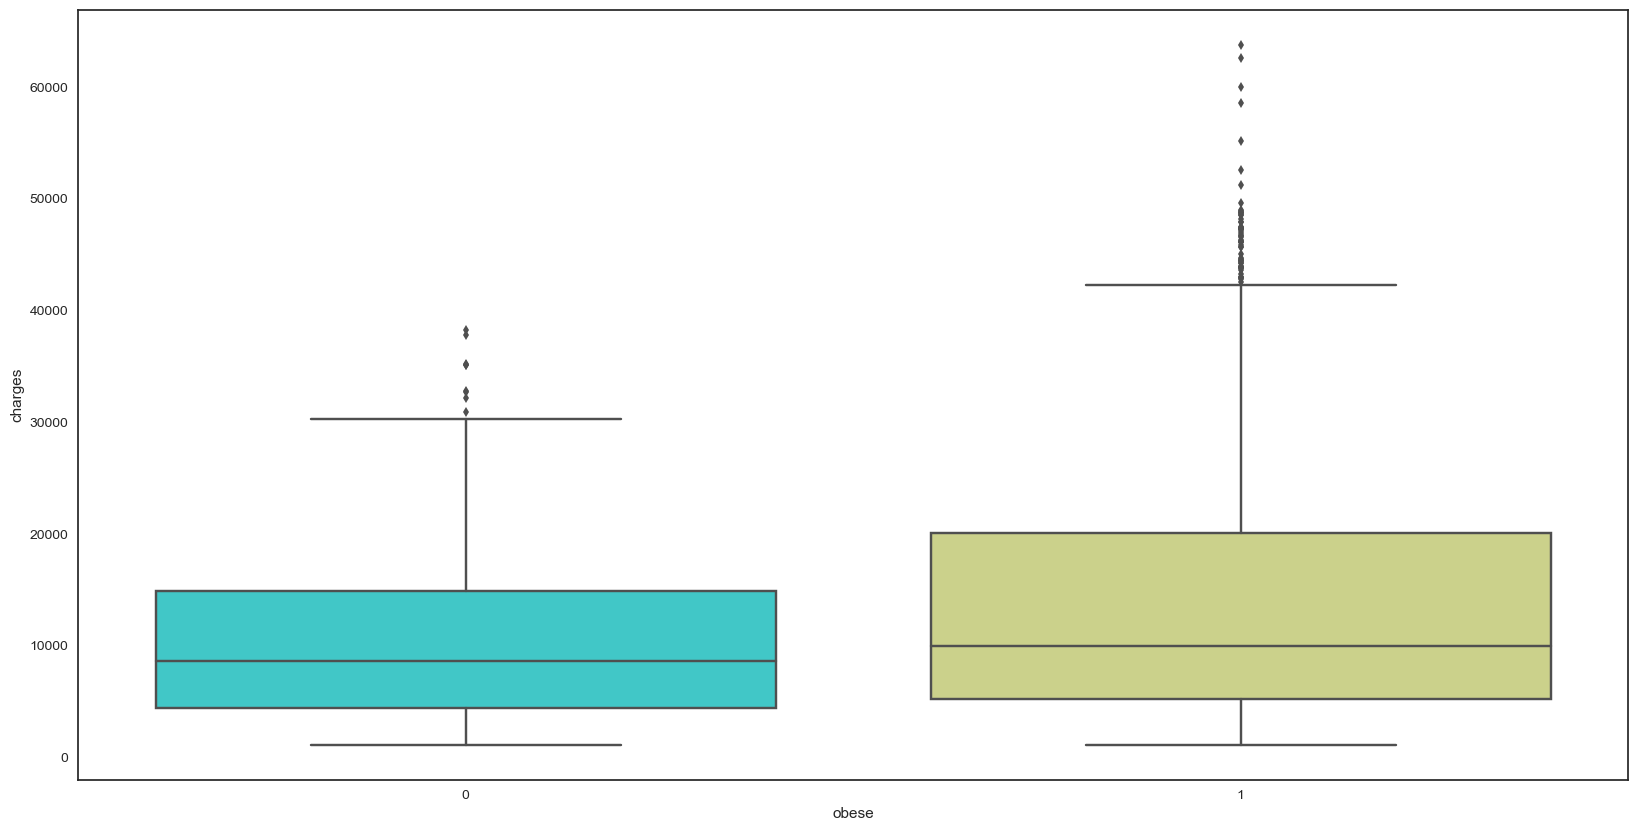

In [141]:
fig = plt.figure(1, figsize=(20, 10))
sns.set_style('white')
ax = sns.boxplot(x="obese", y="charges", data=df, palette='rainbow')

The idea behind deriving a new variable bmi30 is that 30 is the bmi threshold for obesity and we all know that obesity plays a huge role in a person’s health. As we can see, although obese and non-obese people has the same median medical expenses, their average expenditure differ by almost USD 5000.

In [142]:
def smoking_habits(column):
    mapped=[]
    
    for row in column:
        
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
        
        
    return mapped
df["smoker"]=smoking_habits(df["smoker"])

In [143]:
def gender(column):
    mapped=[]
    
    for row in column:
        
        if row=="male":
            mapped.append(1)
        else:
            mapped.append(0)
        
        
    return mapped
df["sex"]=gender(df["sex"])

In [144]:
def region(column):
    mapped=[]
    
    for row in column:
        
        if row=="northeast":
            mapped.append(1)
        elif row=="northwest":
            mapped.append(2)
        elif row=="southeast":
            mapped.append(3)    
        else:
            mapped.append(4)
        
        
    return mapped
df["region"]=region(df["region"])
df.head()

age  sex     bmi  children  smoker  region      charges  obese  overweight  \
0   19    0  27.900         0       1       4  16884.92400      0           1   
1   18    1  33.770         1       0       3   1725.55230      1           0   
2   28    1  33.000         3       0       3   4449.46200      1           0   
3   33    1  22.705         0       0       2  21984.47061      0           0   
4   32    1  28.880         0       0       2   3866.85520      0           1   

   normalweight  underweight  
0             0            0  
1             0            0  
2             0            0  
3             1            0  
4             0            0

In [145]:
corr_data = df
corr_data = corr_data.corr()
corr_data.head()

age       sex       bmi  children    smoker    region  \
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   

           charges     obese  overweight  normalweight  underweight  
age       0.299008  0.085668   -0.012910     -0.078098    -0.061373  
sex       0.057292  0.047317   -0.026460     -0.024759    -0.031388  
bmi       0.198341  0.799211   -0.319722     -0.591119    -0.270382  
children  0.067998  0.009807   -0.020039      0.008216    -0.004956  
smoker    0.787251  0.000810   -0.020629      0.022593     0.010424

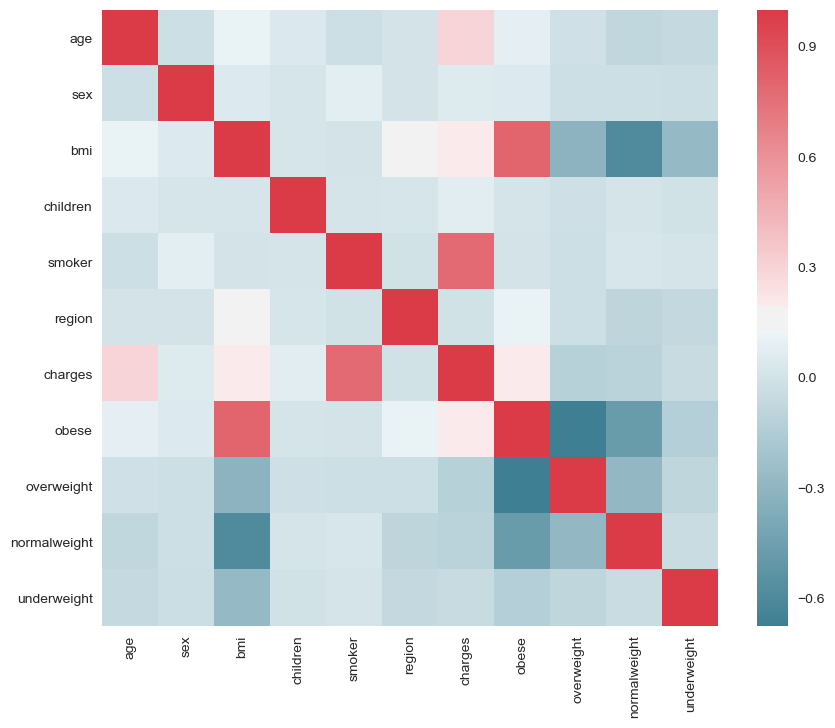

In [146]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

age :  0.29900819333064765
sex :  0.05729206220202535
bmi :  0.19834096883362887
children :  0.0679982268479048
smoker :  0.7872514304984772
region :  0.0062082349094444555
charges :  1.0
obese :  0.1995317242615864
overweight :  0.12008319298363222
normalweight :  0.1065120273397049
underweight :  0.04811708881545021


Text(0,0.5,'Absolute correlation')

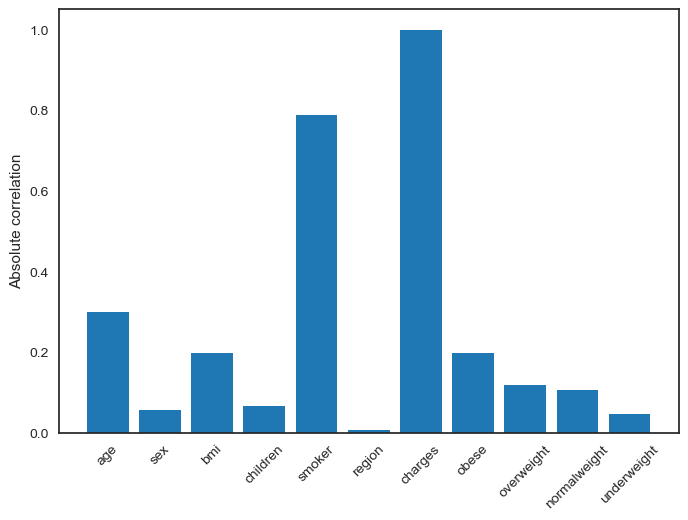

In [147]:
import scipy as sp

corr_vals=[]
collabel=[]
for col in [i for i in df.columns]:
    
    p_val=sp.stats.pearsonr(df[col],df["charges"])
    corr_vals.append(np.abs(p_val[0]))
    print(col,": ",np.abs(p_val[0]))
    collabel.append(col)
plt.bar(range(1,len(corr_vals)+1),corr_vals)
plt.xticks(range(1,len(corr_vals)+1),collabel,rotation=45)
plt.ylabel("Absolute correlation")